#   DIP ASSIGNMENT 3 <br>
#            AREEBA FATAH AND AMNA KHAN <br>
#            21I0349 & 21I0345

In [3]:
# IMPORTING DESIRED LIBRARIES
from tkinter import messagebox 
from tkinter import filedialog                                                      # FOR UPLOADING FILE
from tkinter import *
import tkinter as tk 
import numpy as np                                                                  # FOR CALCULATIONS
import cv2                                                                          # IMAGE LIBRARY                           
from PIL import Image,ImageTk,ImageFilter,ImageOps                                  # FOR READING IMAGE 
import matplotlib.pyplot as plt

# TASK 1

### 1-  EROSION

In [4]:
def Erosion(img,structuring_element):                                          # PARAMETERS AS DEFINED IN THE DOCUMENT
    #img=np.where(img>=50,1,0).astype(np.uint8)
    result=np.zeros_like(img)                                                  # CREATING A RESULTANT IMAGE LIKE IMAGE WITH 0s
    structuring_element_height=structuring_element.shape[0]                    # GETTING STRUCTUREING ELEMENT HEIGHT & WIDTH
    structuring_element_width=structuring_element.shape[1]                     # PADDING HEIGHT = S//2 WHERE S IS THE 
    padding_height=structuring_element_height//2                               # DEFINING PADDING WIDTH AND HEIGHT
    padding_width=structuring_element_width//2                                  
    pad_with_height=(padding_height,padding_height)                            # PADDING ON BOTH SIDES
    pad_with_width=(padding_width,padding_width)                               # CREATING IMAGE WITH PADDING
    image=np.pad(img,(pad_with_height,pad_with_width),mode='constant')  
    height_img=img.shape[0]                                                    # GETTING IMAGE HEIGHT
    width_img=img.shape[1]                                                     # GETTING_IMAGE_WIDTH
    NonZeroELementMask=(structuring_element==1)                                # MASK NECESSARY TO IGNORE 0's
    for row in range(height_img):                                # FOR ALL ELEMENTS IN THE FIT REGION
        for column in range(width_img):                                        # GETTING THE NEIGHBOURHOOD
            neighbourhood=image[row:row+structuring_element_height,column:column+structuring_element_width]
            if np.all(neighbourhood[NonZeroELementMask]):                      # IF NEIGHBOURHOOD == S FOR ALL PIXELS
                result[row,column]=255
            else:
                result[row,column]=0
    return result                                                              # RETURNING RESULT

#### COMPARISION WITH CV2

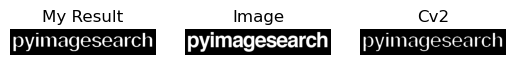

In [5]:
img=cv2.imread('4.png',cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],dtype=np.uint8)
my_result=Erosion(img, kernel)
cv2_result=cv2.erode(img, kernel)

plt.subplot(1, 3, 1)
plt.imshow(my_result, cmap='gray')
plt.title('My Result')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2_result, cmap='gray')
plt.title('Cv2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

### 2-  DILATION

In [6]:
def Dilation(img,structuring_element):                                         # PARAMETERS AS DEFINED IN THE DOCUMENT
    #img=np.where(img>=50,1,0).astype(np.uint8)
    result=np.zeros_like(img)                                                  # CREATING A RESULTANT IMAGE LIKE IMAGE WITH 0s
    structuring_element_height=structuring_element.shape[0]                    # GETTING STRUCTUREING ELEMENT HEIGHT & WIDTH
    structuring_element_width=structuring_element.shape[1]                     # PADDING HEIGHT = S//2 WHERE S IS THE 
    padding_height=structuring_element_height//2                               # DEFINING PADDING WIDTH AND HEIGHT
    padding_width=structuring_element_width//2                                  
    pad_with_height=(padding_height,padding_height)                            # PADDING ON BOTH SIDES
    pad_with_width=(padding_width,padding_width)                               # CREATING IMAGE WITH PADDING
    image=np.pad(img,(pad_with_height,pad_with_width),mode='constant')  
    height_img=img.shape[0]                                                    # GETTING IMAGE HEIGHT
    width_img=img.shape[1]                                                     # GETTING_IMAGE_WIDTH
    NonZeroELementMask=(structuring_element!=0)                                # MASK NECESSARY TO IGNORE 0's
    for row in range(height_img):                                              # FOR ALL ELEMENTS IN THE HIT REGION
        for column in range(width_img):                                        # GETTING THE NEIGHBOURHOOD
            neighbourhood=image[row:row+structuring_element_height,column:column+structuring_element_width]
            if np.any(neighbourhood[NonZeroELementMask]):                      # IF NEIGHBOURHOOD == S FOR ALL PIXELS
                result[row,column]=1
            else:
                result[row,column]=0  
    return result                                                              # RETURNING RESULT

#### COMPARISION WITH CV2

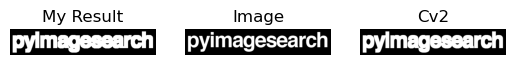

In [7]:
img=cv2.imread('4.png',cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],dtype=np.uint8)
my_result=Dilation(img, kernel)
cv2_result=cv2.dilate(img, kernel)


plt.subplot(1, 3, 1)
plt.imshow(my_result, cmap='gray')
plt.title('My Result')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2_result, cmap='gray')
plt.title('Cv2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

### 2- OPENING

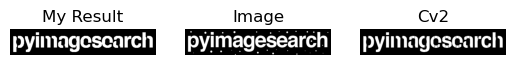

In [8]:
def Opening(img,structuring_element):
    img=Erosion(img,structuring_element)
    return Dilation(img,structuring_element)


img=cv2.imread('5.png',cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],dtype=np.uint8)
my_result=Opening(img, kernel)
cv2_result=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

plt.subplot(1, 3, 1)
plt.imshow(my_result, cmap='gray')
plt.title('My Result')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2_result, cmap='gray')
plt.title('Cv2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

### CLOSING

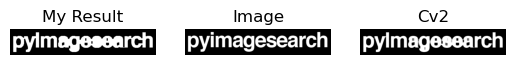

In [9]:
def Closing(img,structuring_element):
    return Erosion(Dilation(img,structuring_element),structuring_element)

img=cv2.imread('4.png',cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],dtype=np.uint8)
my_result=Closing(img, kernel)
cv2_result=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)


plt.subplot(1, 3, 1)
plt.imshow(my_result, cmap='gray')
plt.title('My Result')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2_result, cmap='gray')
plt.title('Cv2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

# TASK 2 

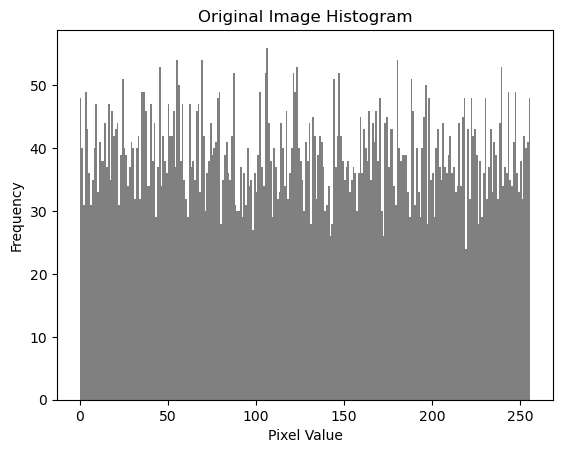

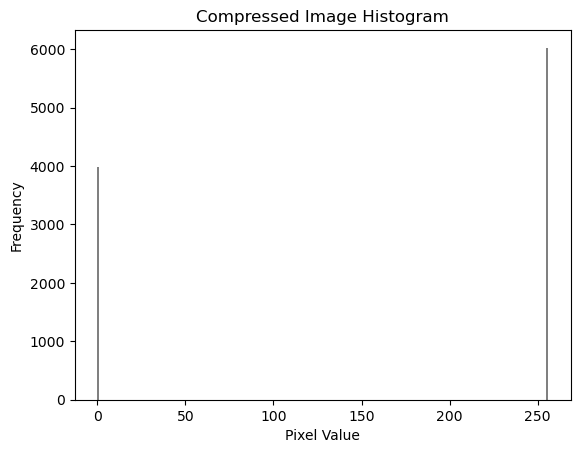

In [10]:
def compress_image(image,threshold):
    compressed_image=np.where(image<=threshold,0,255)
    return compressed_image

def plot_histogram(image,title):
    plt.hist(image.ravel(),bins=256,range=(0, 256),color='gray')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
image=np.random.randint(0,256,size=(100,100),dtype=np.uint8)
threshold=100
compressed_image=compress_image(image, threshold)
plot_histogram(image, 'Original Image Histogram')
plot_histogram(compressed_image, 'Compressed Image Histogram')

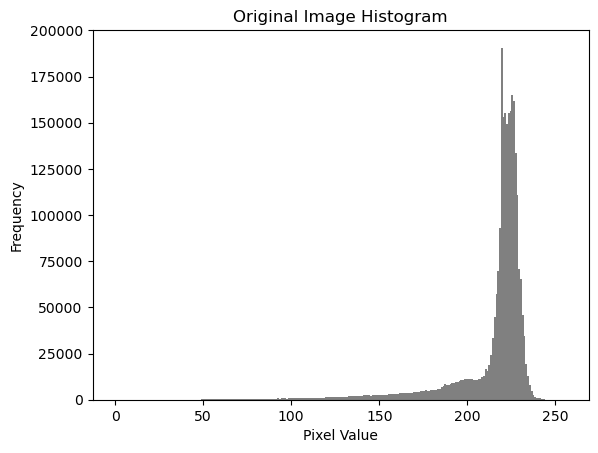

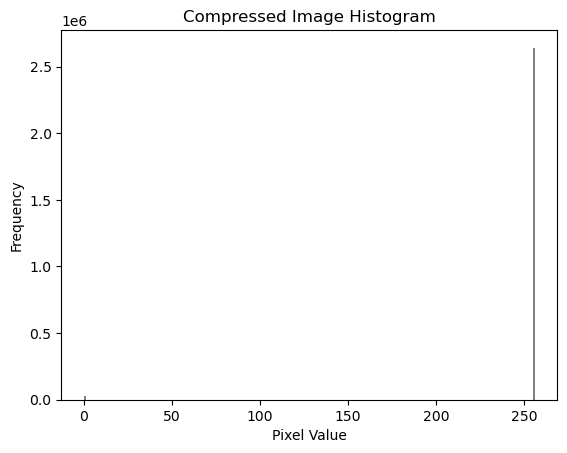

In [11]:
def compress_image(image, threshold):
    compressed_image = np.where(image <= threshold, 0, 255)
    return compressed_image

def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

img = Image.open('1.jpg').convert('L')  # Convert to grayscale
image = np.array(img)

# Define threshold
threshold = 100
compressed_image = compress_image(image, threshold)

plot_histogram(image, 'Original Image Histogram')
plot_histogram(compressed_image, 'Compressed Image Histogram')

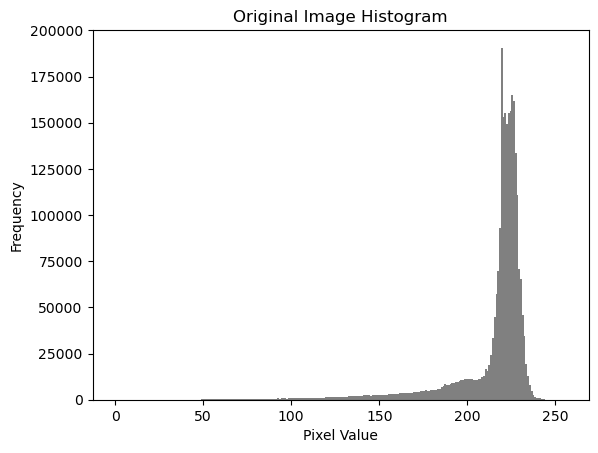

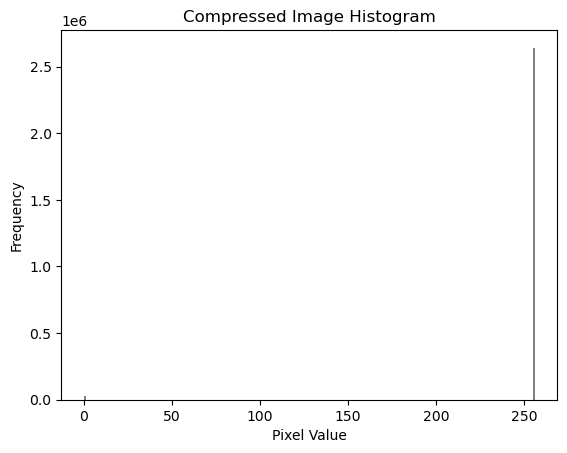

In [12]:
img=Image.open('1.jpg').convert('L')  
image=np.array(img)
threshold = 100
compressed_image = compress_image(image, threshold)
plot_histogram(image, 'Original Image Histogram')
plot_histogram(compressed_image, 'Compressed Image Histogram')

# APPLICATION

# UPLOADING FILES

In [13]:
# 1- ====================> UPLOADING & READING FILE <===================== 

def upload_file():                                                                  # FUNCTION FOR UPLOADING
    global filename,frame1,img,operations                                           # ACCESSING GLOBAL VARIABLE FOR FILE NAME
    types=[('Jpg files','*.jpg'),('Jpeg files','*.jpeg'),('Png files','*.png'), ('MP4 file','*.mp4')] # GETTING ALLOWED TYPES
    filename=filedialog.askopenfilename(filetypes=types)                                              # OPENING FILE  
    button2=tk.Label(frame1,text="filename = "+filename)                            # BUTTON FOR DISPLAYING FILE NAME
    button2.place(x=0,y=800)
    if filename.lower().endswith(('.jpg','.jpeg','.png')):                          # IN CASE IT IS AN IMAGE
        img=cv2.imread(filename)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                                     # RESIZE AND COLOR CONVERSION
        img=cv2.resize(img,(400, 400)) 
        show_input_image(img)                                                       # SHOWING INPUT IMAGE
        hide_next_button()                                                          # HIDING NEXT BUTTON FOR IMAGES
    elif filename.lower().endswith(('.mp4')):                                       # NOW FOR VIDEO
        video_to_images(filename)                                                   # SHOWING INPUT FRAME INSIDE THIS FUNCTION
        show_next_button()                                                          # DISPLAYING THE NEXT BUTTON 
    operations.clear()

        
# CONVERTING VID TO IMAGES        
def video_to_images(filename,flag=0):
    global frames,current_frame_no,img             # DECLARING TWO GLOBAL VARIABLES      
    frames=[]                                      # CREATING A LIST OF FRAMES
    one_frame_info=cv2.VideoCapture(filename)      # GETTING THE FRAMES 
    while one_frame_info.isOpened():               # FOR THE ALL FRAMES
        checker,one_frame=one_frame_info.read()
        if not checker:                            # CHECK FOR THE VALUE OF CHECKER IF IT IS NONE THEN BREAK THE LOOP NO MORE FRAMES LEFT 
            break
        one_frame=cv2.cvtColor(one_frame,cv2.COLOR_BGR2RGB)      # COLOR CONVERSION AND RESIZING
        one_frame=cv2.resize(one_frame,(400, 400))
        frames.append(one_frame)                                 # APPENDING TO THE GLOBAL LIST
    one_frame_info.release()
    if flag==0:
        current_frame_no=0                                       # MAKE THE CURRENT INDEX 0 AS WE ARE JUST STARTING
    input_frame(current_frame_no)                                # DISPLAY THE FRAME
    img=frames[current_frame_no]

# HELPER FUNCTIONS FOR BUTTONS + I/O

In [14]:
# 2- ==========> INPUT / OUTPUT DISPLAY <=================
# IMAGES: 
def show_input_image(img):  
    global frame2# CREATE A LABEL                           
    l1=tk.Label(frame2,text='INPUT',width=20,font=font)
    l1.place(x=155,y=100)                                          # PLACE IT 
    img=Image.fromarray(img)                                       # CONVERT THE IMAGE BACK TO TK IMAGE 
    img=ImageTk.PhotoImage(img)
    img_label.config(image=img)                                    # CONFIGURE THE IMAGE AND HIDE THE NEXT BUTTON 
    img_label.image=img
    hide_next_button()
    
    
def show_output_image(img):  
    global frame2                                                  # SAME AS ABOVE FUNCTION WITH JUST DIFFERENT LABEL TEXT
    l1 = tk.Label(frame2,text='OUTPUT',width=20,font=font) 
    l1.place(x=600,y=100) 

    global img_output_label                                        # GETTING THE GLOBAL OUTPUT IMAGE   
    img=cv2.resize(img, (400, 400))
    img=Image.fromarray(img)  
    img = ImageTk.PhotoImage(img) 
    img_output_label.config(image=img)
    img_output_label.image=img  
    hide_next_button()

                                                                   # VIDEO PART:    
def input_frame(index):
    global frame2
    l1=tk.Label(frame2,text='INPUT',width=20,font=font)            # CREATE A LABEL & PLACE IT 
    l1.place(x=155,y=100) 
    global current_frame_no                                         # CURRENT INDEX=INDEX
    current_frame_no=index                                          
    img=frames[index]                                               # GET THE FRAME/IMG 
    img=Image.fromarray(img) 
    img=ImageTk.PhotoImage(img)                                     # CONVERTING FROM CV2-> PIL-> TKINTER 
    img_label.config(image=img)
    img_label.image=img
    show_next_button()                                              # SHOW NEXT BUTTON 
    
def show_frame(index):
    global frame2
    l1 = tk.Label(frame2,text='OUTPUT',width=20,font=font)          # CREATE A LABEL & PLACE IT 
    l1.grid(row=5,column=25,columnspan=4)
    global current_frame_no                   
    current_frame_no=index                                          # GET THE FRAME/IMG
    img=frames[index]
    img=Image.fromarray(img)  
    img=ImageTk.PhotoImage(img)                                     # CONVERTING FROM CV2-> PIL-> TKINTER
    img_output_label.config(image=img)
    img_output_label.image=img 
    show_next_button()

                                                                   # FOR SHOWING THE NEXT FRAME OF A VIDEO
def next_frame_display():
    global current_frame_no,img                                    # GET CURRENT INDEX  
    if frames:                                                     # IF FRAMES ARE NOT EMPTY
        current_frame_no+=1                                        # INC THE FRAME NO. AND DIVIDE IT BY TOTAL FRAMES
        current_frame_no%=len(frames)
        input_frame(current_frame_no)                              # DISPLAY INPUT FRAME AND OUTPUT AFTER PROCESSING
        img=frames[current_frame_no]
        img=FILTER_APPLIER_SEQ()

def previous_frame_display():
    global current_frame_no,img
    if frames:
        current_frame_no-=1                                        # DECREMENTING THE FRAME NUMBER
        if current_frame_no<0:                                     # FOR LAST FRAME
            current_frame_no=len(frames)-1
        input_frame(current_frame_no)                              # UPDATE IMAGE
        img=frames[current_frame_no] 
        img=FILTER_APPLIER_SEQ()                                   # APPLY FILTER APPLIER VERSION FOR NEXT AND PREVIOUS FRAMES
        
                                                                   # SELECTIVE DISPLAY OF NEXT BUTTON AND PREVIOUS BUTTON
def hide_next_button():
    next_button.grid_forget()
    next_button1.grid_forget()
    previous_button.grid_forget()
    previous_button1.grid_forget()

def show_next_button():
    global frame2
    next_button.place(x=100,y=560)
    next_button1.place(x=550,y=560)
    previous_button.place(x=350,y=560)
    previous_button1.place(x=800,y=560)
    
def Clear_up():
    global filename,img
    if filename.lower().endswith(('.jpg','.jpeg','.png')):                          # IN CASE IT IS AN IMAGE
        img=cv2.imread(filename)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                                     # RESIZE AND COLOR CONVERSION
        img=cv2.resize(img,(400,400)) 
        show_input_image(img)                                                       # SHOWING INPUT IMAGE
        hide_next_button()                                                          # HIDING NEXT BUTTON FOR IMAGES
    elif filename.lower().endswith(('.mp4')):                                       # NOW FOR VIDEO
        video_to_images(filename,flag=1)                                            # SHOWING INPUT FRAME INSIDE THIS FUNCTION
        show_next_button()                                                          # DISPLAYING THE NEXT BUTTON 
    show_output_image(img)                                                          # SHOWING IMAGE
    operations.clear()                                                              # RESET THE LIST

# FILTERS

In [15]:
# 3- ===============> FILTERS<========================  
# 1- HISTOGRAM FILTER
def histogram_equalization(img):                       # PARAMETER FOR ALL FUNCTIONS IS GRAY SCALED IMAGE
    pixel_range=[0,256]                                # DEFINING PIXEL RANGE
    k=256                                              # DEFINING K
    histogram,frequencies=np.histogram(img,bins=k,range=pixel_range)                  # GETTING FREQUENCIES 
    cummulative_sum=(np.cumsum(histogram))*max(histogram)/max((np.cumsum(histogram))) # ADDING THE VALUES
    eqimg=np.interp(img,frequencies[:-1],cummulative_sum)                             # INTERP THE IMAGE WITH C_SUM
    img=(eqimg-np.min(eqimg))/(np.max(eqimg)-np.min(eqimg))                           # NORMALIZING IT
    return (img*255).astype(np.uint8)                                                 # RETURNING IT BACK

# 2- LAPLACIAN FILTER 
def laplacian_filter(img):
    if len(img.shape)==3:                            # CONVERSION TO GRAY
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    laplace_kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]])                               # DEFINING FILTER
    return cv2.filter2D(src=img,ddepth=-1,kernel=laplace_kernel)                      # APPLYING IT

# 3- THRESHOLDING
def thresholding(image):  
    if len(image.shape)==3:                            # CONVERSION TO GRAY
            image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    threshold=50                                                                     # ARBITRARY VALUE
    IMG=np.where(image>=threshold,255,0).astype(np.uint8)                             # ASSIGNING VALUES WITH NP AND RETURNING
    return IMG

# 4- SMOOTHING
def smoothing(image):
    filter_size=3                                                                     # DEFINING SIZE
    filter_smoothing=np.ones((filter_size,filter_size),dtype=np.float32)/(filter_size*filter_size)  # CREATING FILTER
    image=np.convolve(image.flatten(),filter_smoothing.flatten(), mode='same').reshape(image.shape) # APPLYING IT
    return image.astype(np.uint8)


# 5- KMEANS CLUSTERING 
def Kmeans(data,k):
    MX_ITERATIONS=12                                                          # MAX ITERATIONS
    centers=data[np.random.choice(data.shape[0],k,replace=False)]             # RANDOM CLUSTERS AT FIRST
    for x in range(MX_ITERATIONS):
        distances=np.sqrt(((data-centers[:,np.newaxis])**2).sum(axis=2))      # DISTANCE OF ELEMENTS
        assigned_labels=np.argmin(distances,axis=0)                           # ASSIGNMENT
        new_centers=[]                                                        # NEW CENTERS LIST
        for i in range(k):                                                    # FOR ALL CLUSTERS
            cluster_points=data[assigned_labels==i]                           # GET POINTS
            if len(cluster_points)==0:                                        # IN CASE OF NONE ASSIGN ZEROS
                cluster_center=np.ones(centers[i].shape) 
            else:
                cluster_center=np.mean(cluster_points,axis=0)                 # OTHERWISE MEAN
            new_centers.append(cluster_center) 
        new_centers=np.array(new_centers)  
        if np.allclose(centers,new_centers,atol=0.75):                        # BREAKING CONDITION
            break
        if(new_centers.all()==centers.all()):                                 # No UPDATION OF CLUSTERS
            break
        centers=new_centers
    return assigned_labels,centers                                            # RETURNING LABLES WITH CENTRES 

# THIS FUNCTION CALCULATES THE SUM OF SQUARES OF ALL PIXELS IN A CENTER 
def Intra_Cluster_Sum_of_Sqaures(img,centers,assigned_labels):                   
    Sum_Of_Squares=0                                                                 # VARIABLE FOR STORING SUM(SQUARES)
    for i in range(len(centers)):
        pixels_in_cluster=img[assigned_labels==i]                                    # FOR EACH CLUSTER
        Sum_Of_Squares+=np.sum((pixels_in_cluster-centers[i])**2)
    return Sum_Of_Squares

# FINDING THE EDGE/ELBOW OF THE CLUSTERS
def Elbow_method(img):
    MX_CLUSTER=11                                                                # ADDING ONE 
    All_Sum_of_Sqs=[]                                                            # FOR DIFFERENT VALS OF K
    for k in range(1,MX_CLUSTER):
        assigned_labels,centers=Kmeans(img,k)                                    # KMEANS CALL
        Sum_Of_Squares=Intra_Cluster_Sum_of_Sqaures(img,centers,assigned_labels) # SUM OF SQS CALL
        All_Sum_of_Sqs.append(Sum_Of_Squares)                                    # LIST UPDATION
    Diff=np.diff(np.diff(All_Sum_of_Sqs))                                        # DIFFERNCE OF ALL ELEMENTS
    return np.argmax(Diff)+2                                                     # SELECTING ONE THAT PARTITIONS WELL



def Clustering(img):                                                             # ACTUAL CLUSTERING 
    try:
        pixel_vals=img.reshape((-1,3))                                           # ERROR HANDLING FOR 3D AND 2D PICS
    except ValueError:
        pixel_vals=img.reshape((-1,1))                                          
    pixel_vals=np.float32(pixel_vals)                                            # FINDING OPTIMAL CLUSTERS
    k=Elbow_method(pixel_vals)
    print("K =",Elbow_method(pixel_vals))
    labels,centers=Kmeans(pixel_vals,Elbow_method(pixel_vals))                   # APPLYING KMEANS
    centers=np.uint8(centers)
    result=centers[labels]                     
    result=result.reshape(img.shape)                                             # SEGEMENTING THE IMAGE
    return result


def LOG(img):
    if len(img.shape)==3:                                                        # CONVERSION TO GRAY
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kernel_size=2
    x=np.arange(-(kernel_size-1)//2,(kernel_size-1)//2+1)                        # ASSIGNING X AND Y 
    y=np.arange(-(kernel_size-1)//2,(kernel_size-1)//2+1)
    xx,yy=np.meshgrid(x,y)                                                     
    kernel=(1/(2*np.pi*2.3**2))*np.exp(-(xx**2+yy**2)/(2*2.3**2))                # UPDATING KERNEL
    kernel/=np.sum(kernel)
    img=cv2.filter2D(img,-1,kernel)                                              # FILTERING
    return laplacian_filter(img)                                                 # LAPLACIAN

def adaptive_thresholding(img,const=2):
    MX_VAL=255                                                                   # MAX VAL
    BLOCK=20
    if len(img.shape)==3:                                                        # CONVERSION TO GRAY
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        img=img
    t_img=np.zeros_like(img)                                                     # GETTING ZEROS LIKE OF  IMAGE              
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):                                            # DIVISION INTO BLOCKS
            R_START=max(0,i- BLOCK//2)
            R_END=min(img.shape[0],i + BLOCK//2+1)
            C_START=max(0,j-BLOCK//2)
            C_END=min(img.shape[1],j+BLOCK//2+1)                                 # DEFINITION OF BOUNDARIES
            L_MEAN=np.mean(img[R_START:R_END,C_START:C_END])                     # FINDING LOCAL MEAN OF BLOCK
            t_img[i,j]=MX_VAL if img[i,j]>L_MEAN-const else 0                    # MEAN OF BLOCK - CONSTANT -> THRESHOLDING
    return t_img                                                                 # RETURNING RESULT




#   Erosion
def Erosion(img,structuring_element):                                          # PARAMETERS AS DEFINED IN THE DOCUMENT
    if len(img.shape)==3:                                                        # CONVERSION TO GRAY
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        img=img
    result=np.zeros_like(img)                                                  # CREATING A RESULTANT IMAGE LIKE IMAGE WITH 0s
    structuring_element_height=structuring_element.shape[0]                    # GETTING STRUCTUREING ELEMENT HEIGHT & WIDTH
    structuring_element_width=structuring_element.shape[1]                     # PADDING HEIGHT = S//2 WHERE S IS THE 
    padding_height=structuring_element_height//2                               # DEFINING PADDING WIDTH AND HEIGHT
    padding_width=structuring_element_width//2                                  
    pad_with_height=(padding_height,padding_height)                            # PADDING ON BOTH SIDES
    pad_with_width=(padding_width,padding_width)                               # CREATING IMAGE WITH PADDING
    image=np.pad(img,(pad_with_height,pad_with_width),mode='constant')  
    height_img=img.shape[0]                                                    # GETTING IMAGE HEIGHT
    width_img=img.shape[1]                                                     # GETTING_IMAGE_WIDTH
    NonZeroELementMask=(structuring_element!=0)                                # MASK NECESSARY TO IGNORE 0's
    for row in range(height_img):                                              # FOR ALL ELEMENTS IN THE FIT REGION
        for column in range(width_img):                                        # GETTING THE NEIGHBOURHOOD
            neighbourhood=image[row:row+structuring_element_height,column:column+structuring_element_width]
            if np.all(neighbourhood[NonZeroELementMask]):                      # IF NEIGHBOURHOOD == S FOR ALL PIXELS
                result[row,column]=255
            else:
                result[row,column]=0
    return result                                                              # RETURNING RESULT



# Dilation
def Dilation(img,structuring_element):                                         # PARAMETERS AS DEFINED IN THE DOCUMENT
    result=np.zeros_like(img)                                                  # CREATING A RESULTANT IMAGE LIKE IMAGE WITH 0s
    structuring_element_height=structuring_element.shape[0]                    # GETTING STRUCTUREING ELEMENT HEIGHT & WIDTH
    structuring_element_width=structuring_element.shape[1]                     # PADDING HEIGHT = S//2 WHERE S IS THE 
    padding_height=structuring_element_height//2                               # DEFINING PADDING WIDTH AND HEIGHT
    padding_width=structuring_element_width//2                                  
    pad_with_height=(padding_height,padding_height)                            # PADDING ON BOTH SIDES
    pad_with_width=(padding_width,padding_width)                               # CREATING IMAGE WITH PADDING
    image=np.pad(img,(pad_with_height,pad_with_width),mode='constant')  
    height_img=img.shape[0]                                                    # GETTING IMAGE HEIGHT
    width_img=img.shape[1]                                                     # GETTING_IMAGE_WIDTH
    NonZeroELementMask=(structuring_element!=0)                                # MASK NECESSARY TO IGNORE 0's
    for row in range(height_img):                                              # FOR ALL ELEMENTS IN THE HIT REGION
        for column in range(width_img):                                        # GETTING THE NEIGHBOURHOOD
            neighbourhood=image[row:row+structuring_element_height,column:column+structuring_element_width]
            if np.any(neighbourhood[NonZeroELementMask]):                      # IF NEIGHBOURHOOD == S FOR ALL PIXELS
                result[row,column]=255
            else:
                result[row,column]=0
                
    return result                                                              # RETURNING RESULT


# Opening
def Opening(img,structuring_element):
    return Dilation(Erosion(img,structuring_element),structuring_element)

# Closing
def Closing(img,structuring_element):
    return Erosion(Dilation(img,structuring_element),structuring_element)


def compress_image(img, threshold):
    gray_img = np.mean(img, axis=2)
    compressed_img = np.where(gray_img > threshold, 255, 0)
    compressed_img = np.stack((compressed_img,) * 3, axis=-1).astype(np.uint8)
    return compressed_img

In [16]:
# CALLER FUNCTIONS
def Erosion_Caller(img):
    img=thresholding(img)
    structuring_element=np.array([[0, 1, 0],[0, 1, 0],[0, 1, 0]],dtype=np.uint8)
    return Erosion(img,structuring_element)
def Dilation_Caller(img):
    img=thresholding(img)
    structuring_element=np.array([[0, 1, 0],[0, 1, 0],[0, 1, 0]],dtype=np.uint8)
    return Dilation(img,structuring_element)
def Opening_Caller(img):
    img=thresholding(img)
    structuring_element=np.array([[0, 1, 0],[0, 1, 0],[0, 1, 0]],dtype=np.uint8)
    return Opening(img,structuring_element)
def Closing_Caller(img):
    img=thresholding(img)
    structuring_element=np.array([[0, 1, 0],[0, 1, 0],[0, 1, 0]],dtype=np.uint8)
    return Closing(img,structuring_element)

def compress_image_caller():
    threshold=100
    return compress_image(img, threshold)
    
    
# 4- =========> FILTER APPLIER FUNCTIONS <=================
#SEQUENCE OF OPERATIONS:
def FILTER_APPLIER_SEQ():
    global filename,img,operations
    if not filename:                                                         # IN CASE OF NO INPUT
        messagebox.showerror('Invalid File','Select a File First')
        return        
    for i in range(len(operations)):                                         # APPLY ALL THE OPERATIONS
        img=operations[i](img)
    show_output_image(img)
    return img
   
    
    
def FILTER_APPLIER():
    global filename,img,operations
    if not filename:                                        # IN CASE OF NO INPUT
        messagebox.showerror('Invalid File','Select a File First')
        return        
    
    # CHOOSING ONE OPTION    
    if menu_options.get()=="Histogram Equalization" :
        result=histogram_equalization(img)              # RESULT HAS THE RESULTANT IMAGE
        operations.append(lambda x:histogram_equalization(x))
        
    elif menu_options.get()=="Laplacian Filter":
        result=laplacian_filter(img)
        operations.append(lambda x: laplacian_filter(x))
        
    elif menu_options.get()=="Averging Filter" :
        result=smoothing(img)
        operations.append(lambda x: smoothing(x))
        
    elif menu_options.get()=="Thresholding" :
        result=thresholding(img)
        operations.append(lambda x:thresholding(x))
        
    elif menu_options.get()=="Clustering" :
        result=Clustering(img)
        operations.append(lambda x:Clustering(x))
    
    elif menu_options.get()=="LOG":
        result=LOG(img)
        operations.append(lambda x:LOG(img))
        
    elif menu_options.get()=="Adaptive Thresholding":
        result = adaptive_thresholding(img)
        operations.append(lambda x:adaptive_thresholding(x))
        
    elif menu_options.get()=="Erosion":
        result = Erosion_Caller(img)
        operations.append(lambda x:Erosion_Caller(x))
    
    elif menu_options.get()=="Dilation":
        result = Dilation_Caller(img)
        operations.append(lambda x:Dilation_Caller(x))
        
    elif menu_options.get()=="Opening":
        result = Opening_Caller(img)
        operations.append(lambda x:Opening_Caller(x))
    
    elif menu_options.get()=="Closing":
        result = Closing_Caller(img)
        operations.append(lambda x:Closing_Caller(x))
    elif menu_options.get() == "Image compression":
        result=compress_image_caller() 
        operations.append(lambda x:compress_image(x,threshold))
        
    else:
        messagebox.showerror('Invalid Filter','Select a Filter First')
        return    
    
    show_output_image(result)
    img=result
    if filename.lower().endswith(('.mp4')):
        show_next_button()
        return img


# MAIN APP

In [17]:


#===============> MAIN FUNCTION <================
root=Tk()
root.title("Editor")
root.geometry('925x500+300+200')
root.configure(bg="#fff")
root.resizable(False, False) 

# DECLARING GLOBAL VARIABLES TO BE USED     
filename=None
img_label=None
img_output_label=None
font=('times',18,'bold')
fram1=None
frame2=None
menu_options=None
next_button=None
next_button1=None
previous_button=None
previous_button1=None
window=Toplevel(root)
frame2=None
frame1=None
img=None
operations=[]
    

def editor():   # MAIN APP FUNCTION                       
    global filename,font,window,img_label,img_output_label,menu_options,next_button,next_button1,frame2,previous_button,previous_button1
    
    # CREATING THE SCREEN
    window.attributes("-fullscreen", True)                          # MAKING IT FULL SCREEN
    window.config(bg='white')                                       # WITH BG BLACK
    window.title("A 'n' A")                                         # APP TITLE
    heading=Label(window,text="A 'n' A  E D I T O R" , fg="#F4C2C2", bg="#fff",font=('Helvetica',30,'bold'))
    heading.place(x=600,y=0)
    
    
    screen_width=window.winfo_screenwidth()                            # WIDTH
    screen_height=window.winfo_screenheight()                          # HEIGHT
    image=Image.open("1.jpg")                                          # OPEN BG IMAGE
    image=image.resize((screen_width,screen_height-60))                # RESIZE TO FIT
    
    image = ImageTk.PhotoImage(image)
    Label(window, image=image,bg='white').place(x=0, y=60)
    
    frame1=Frame(window,width=270,height=190,bg="pink")
    frame1.place(x=5,y=70)
    heading=Label(frame1,text="Options",fg="white", bg="pink",font=('Helvetica',15))
    heading.place(x=7,y=1)
    Button(frame1,width=35,pady=5,text='Upload',bg='#DE5D83',fg='white',border=5,command=upload_file).place(x=5,y=30)
    
    menu_options=tk.StringVar(frame1)
    menu_options.set("Choose Technique")
    Menu=tk.OptionMenu(frame1,menu_options,"Histogram Equalization","Laplacian Filter","Averging Filter","Thresholding","Clustering",
"LOG","Adaptive Thresholding","Erosion","Dilation","Opening","Closing","Image compression")
    Menu.config(bg='#DE5D83',width=35,pady=5, fg='white',border=5) 
    Menu.place(x=5, y=70)

    Button(frame1,width=35,pady=5,text='Apply',bg="#DE5D83",fg='white',border=5,command=FILTER_APPLIER).place(x=5,y=105)
    
    # OPTION 3 EXIT BUTTON
    Button(frame1,width=35,pady=5,text='Exit',bg="#DE5D83",fg='white',border=5,command=window.quit).place(x=5,y=140)
    
    
    frame2=Frame(window,width=1050,height=700,bg="pink")
    frame2.place(x=350,y=150)

    
    # CREATING NEXT BUTTONS
    next_button=tk.Button(frame2,text="Next",command=next_frame_display,height=2,width=20)
    next_button1=tk.Button(frame2,text="Next",command=next_frame_display,height=2,width=20)
    previous_button=tk.Button(frame2,text="Previous",command=previous_frame_display,height=2,width=20)
    previous_button1=tk.Button(frame2,text="Previous",command=previous_frame_display,height=2,width=20)
    Clear=tk.Button(frame2,text="Clear",bg="#DE5D83",fg='white',command=Clear_up,height=2,width=20)
    Clear.place(x=450,y=650)
    
    # DISPLAYIN INPUT AND OUTPUT
    img_label=tk.Label(frame2)
    img_label.place(x=100,y=150)
    img_output_label = tk.Label(frame2)
    img_output_label.place(x=550,y=150)
    window.mainloop()
    
########################### SIGN IN ######################
def sign_in():
    username=user.get()
    password=code.get()
    if username=='admin' and password =='1111':
        editor()
    elif username!='admin' and password !='1111':
        messagebox.showerror('Invalid','Invalid Username and Password')
    elif username=='admin' and password !='1111':
        messagebox.showerror('Invalid','Invalid Password')
    elif username!='admin':
        messagebox.showerror('Invalid','Invalid Username')

img=Image.open("2.png")
img=img.resize((400,400))
img=ImageTk.PhotoImage(img)
Label(root,image=img,bg='white').place(x=50,y=50)  
frame=Frame(root,width=350,height=350,bg="white")
frame.place(x=480,y=70)

heading=Label(frame,text="A 'n' A Editor",fg="#DE5D83",bg="white",font=('Microsoft YaHei UI Light',23,'bold'))
heading.place(x=70,y=5)
def on_enter(e):
    user.delete(0,'end')
    
def on_leave(e):
    name=user.get()
    if name=='':
        user.insert(0,'Username')
        
user=Entry(frame,width=25,fg="black",border=0,bg="white",font=('Microsoft YaHei UI Light',11))
user.place(x=30,y=80)
user.insert(0,'Admin Name')
user.bind('<FocusIn>',on_enter)
user.bind('<FocusOut>',on_leave)
Frame(frame,width=295,height=2,bg="black").place(x=25,y=107)

def on_enter(e):
    code.delete(0,'end')
    
def on_leave(e):
    name=user.get()
    if name=='':
        code.insert(0,'Password')

code=Entry(frame,width=25,fg="black",border=0,bg="white",font=('Microsoft YaHei UI Light',11))
code.place(x=30,y=150)
code.insert(0,'Password')
code.bind('<FocusIn>',on_enter)
code.bind('<FocusOut>',on_leave)
Frame(frame,width=295,height=2,bg="black").place(x=25,y=177)
Button(frame,width=40,pady=7,text='Log in',bg="#DE5D83",fg='white',border=0,command=sign_in).place(x=30,y=204)
root.mainloop()

K = 2


# END